In [1]:
%matplotlib inline
from raw_data_vis import *          

# S-curve

In [ ]:
filepath = "/Users/fran/Dropbox/EUSO/CPU/tor_vergata_oct2017/data_dump/"
sc_filename = filepath + "CPU_RUN_SC__2017_10_14__09_29_04.dat"
with DataVis(sc_filename) as FileVis:
    sc_dac = 8 * 90
    FileVis.plot_sc_2d(sc_dac)

# Zynq data

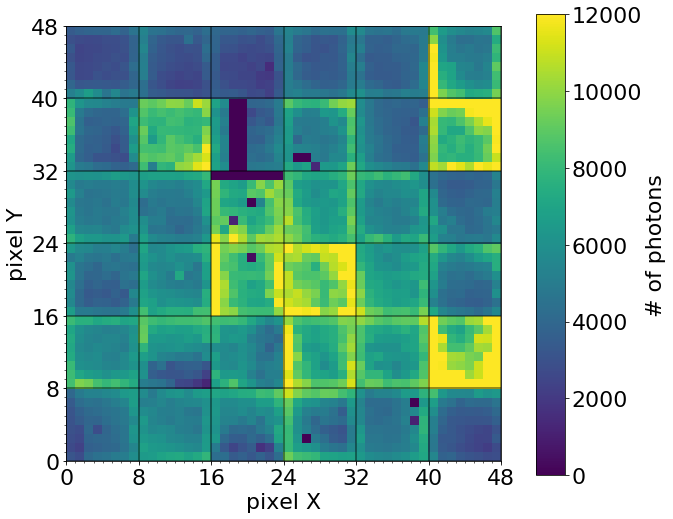

In [2]:
filepath = "/Users/fran/Dropbox/EUSO/CPU/tor_vergata_oct2017/14_10_2017/night/"
filename = filepath + "CPU_RUN_MAIN__2017_10_14__21_09_05.dat"

with DataVis(filename) as FileVis:
    FileVis.cpu_packet_num = 0
    FileVis.trig_packet_num = 0

    data_level = 2
    gtu_num = 0
    gtu_range = 120
    max_counts = 12000 # no threshold
    FileVis.plot_pdm(data_level, gtu_num, max_counts)

## Animate

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# open file
filepath = "/Users/fran/Dropbox/EUSO/CPU/tor_vergata_oct2017/14_10_2017/night/"
filename = filepath + "CPU_RUN_MAIN__2017_10_14__21_09_05.dat"
FileVis = DataVis(filename)
FileVis.cpu_packet_num = 1
FileVis.trig_packet_num = 0
FileVis._read_data()
gtu_range = 120
max_counts = 12000

# initialise
gtu_num = 0
fig = plt.figure(figsize = (10, 10))
focal_surface_packet = FileVis.zynq_data_l2
init_frame = focal_surface_packet[gtu_num]
if max_counts == 0:
    im = plt.imshow(init_frame, cmap = 'viridis', animated = True)
else:
    im = plt.imshow(init_frame, cmap = 'viridis', animated = True, vmax = max_counts)
plt.colorbar()

def updatefig(*args):
    global frame, gtu_num
    gtu_num += 1
    frame = focal_surface_packet[gtu_num]
    im.set_array(frame)
    return im,

# animation
anim = animation.FuncAnimation(fig, updatefig, frames = 120, interval = 500, blit = False)
HTML(anim.to_html5_video())